In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
dataset = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")

In [ ]:
dataset.info()

In [ ]:
training_set = dataset.iloc[:9898].values
test_set = dataset.iloc[9898:].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
model_json = regressor.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
regressor.save_weights("model.h5")

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('../input/trained-values/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor = model_from_json(loaded_model_json)
# load weights into new model
regressor.load_weights("../input/trained-values/model.h5")
print("Loaded model from disk")

In [ ]:
X_test = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test.append(dataset[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_test_values = regressor.predict(X_test)
predicted_test_values = sc.inverse_transform(predicted_test_values)

In [ ]:
predicted_test_values = predicted_test_values

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [ ]:
predicted_test_values = predicted_test_values-1

In [ ]:
# Visualising the results by subtracting 1
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

# **Changing the optimizer**

In [ ]:
regressor2 = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the RNN
regressor2.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('../input/model2/model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor2 = model_from_json(loaded_model_json)
# load weights into new model
regressor2.load_weights("../input/model2/model2.h5")
print("Loaded model from disk")

In [ ]:
# Fitting the RNN to the Training set
regressor2.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
model_json = regressor2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
regressor2.save_weights("model2.h5")

In [ ]:
X_test2 = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test2.append(dataset[i-60:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))

In [ ]:
predicted_test_values2 = regressor2.predict(X_test2)
predicted_test_values2 = sc.inverse_transform(predicted_test_values2)

In [ ]:
predicted_test_values2 = predicted_test_values2

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values2, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [ ]:
predicted_test_values2 = predicted_test_values2-1

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values2, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

# Version 2

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.layers import Dropout
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")
df.info()

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Cotton Price History')
plt.plot(df)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
data = df
dataset = data.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=4, epochs=10)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model2.h5")

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(data[training_data_len:], color = 'red', label = 'Real Cotton Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

# Choosing best parameters

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.layers import Dropout
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 1 columns):
 value    11898 non-null float64
dtypes: float64(1)
memory usage: 93.1 KB


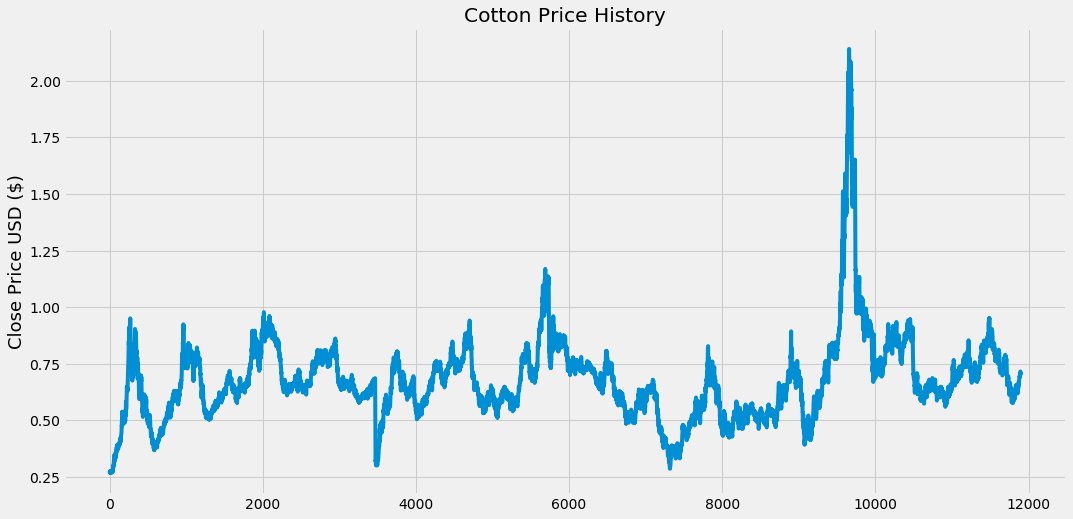

In [3]:
plt.figure(figsize=(16,8))
plt.title('Cotton Price History')
plt.plot(df)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [4]:
def modelTraining(time,neurons,optimizer,batch,epochs,train_data):
    
    x_train=[]
    y_train = []
    for i in range(time,len(train_data)):
        x_train.append(train_data[i-time:i,0])
        y_train.append(train_data[i,0])
    #Convert x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    #Reshape the data into the shape accepted by the LSTM
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    #Build the LSTM network model
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True,input_shape=(x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=neurons, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    
    #Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    #Train the model
    model.fit(x_train, y_train, batch_size=batch, epochs=epochs)
    
    #Test data set
    test_data = scaled_data[training_data_len - time: , : ]#Create the x_test and y_test data sets
    x_test = []
    y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
    for i in range(time,len(test_data)):
        x_test.append(test_data[i-time:i,0])
        
    #Convert x_test to a numpy array 
    x_test = np.array(x_test)
    
    #Reshape the data into the shape accepted by the LSTM
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    
    #Getting the models predicted price values
    predictions = model.predict(x_test) 
    predictions = scaler.inverse_transform(predictions)#Undo scaling
    
    #Plot/Create the data for the graph
    train = df[:training_data_len]
    valid = df[training_data_len:]
    valid['Predictions'] = predictions#Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train)
    plt.plot(valid)
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.savefig('img'+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+'.png')
    plt.show()
    
    #save the model
    model_json = model.to_json()
    with open("model"+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model"+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+".h5")
    
    #Calculate/Get the value of RMSE
    rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
    print(rmse)
    return rmse

Epoch 1/10
9489/9489 [==============================] - 21s 2ms/step - loss: 7.0808e-04
Epoch 2/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.8081e-04
Epoch 3/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.5633e-04
Epoch 4/10
9489/9489 [==============================] - 20s 2ms/step - loss: 1.4866e-04
Epoch 5/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.2394e-04
Epoch 6/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.1840e-04
Epoch 7/10
9489/9489 [==============================] - 18s 2ms/step - loss: 1.1527e-04
Epoch 8/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.0737e-04
Epoch 9/10
9489/9489 [==============================] - 21s 2ms/step - loss: 1.0919e-04
Epoch 10/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.0299e-04


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


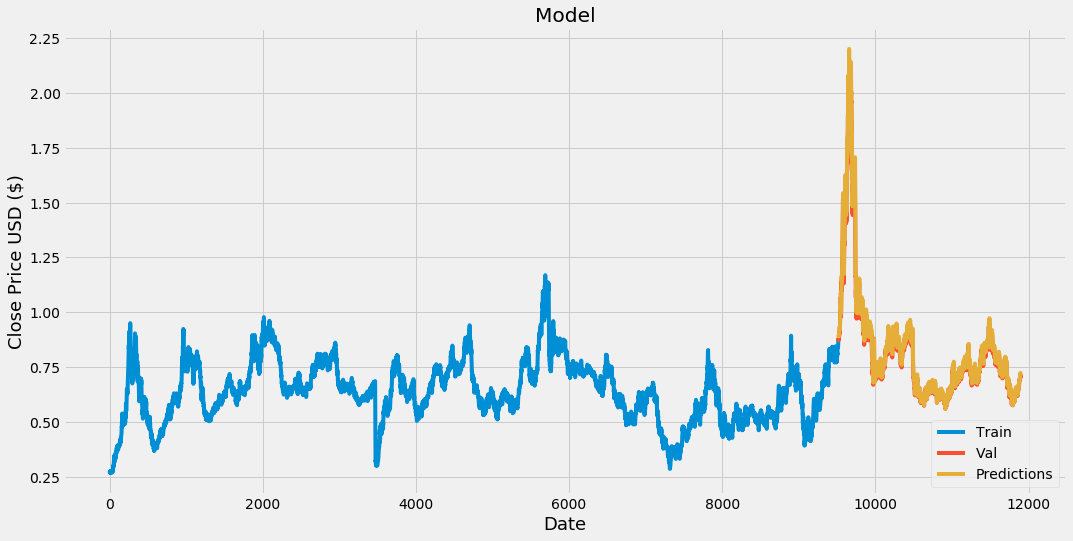

0.024887883639910825
Epoch 1/15
9489/9489 [==============================] - 21s 2ms/step - loss: 7.0376e-04
Epoch 2/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.9907e-04
Epoch 3/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.6005e-04
Epoch 4/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.4406e-04
Epoch 5/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.3135e-04
Epoch 6/15
9489/9489 [==============================] - 19s 2ms/step - loss: 1.1764e-04
Epoch 7/15
9489/9489 [==============================] - 19s 2ms/step - loss: 1.1725e-04
Epoch 8/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.1187e-04
Epoch 9/15
9489/9489 [==============================] - 22s 2ms/step - loss: 1.0623e-04
Epoch 10/15
9489/9489 [==============================] - 20s 2ms/step - loss: 9.9140e-05
Epoch 11/15
9489/9489 [==============================] - 19s 2ms/step - loss: 9.5001e-05
Epoch 12/

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


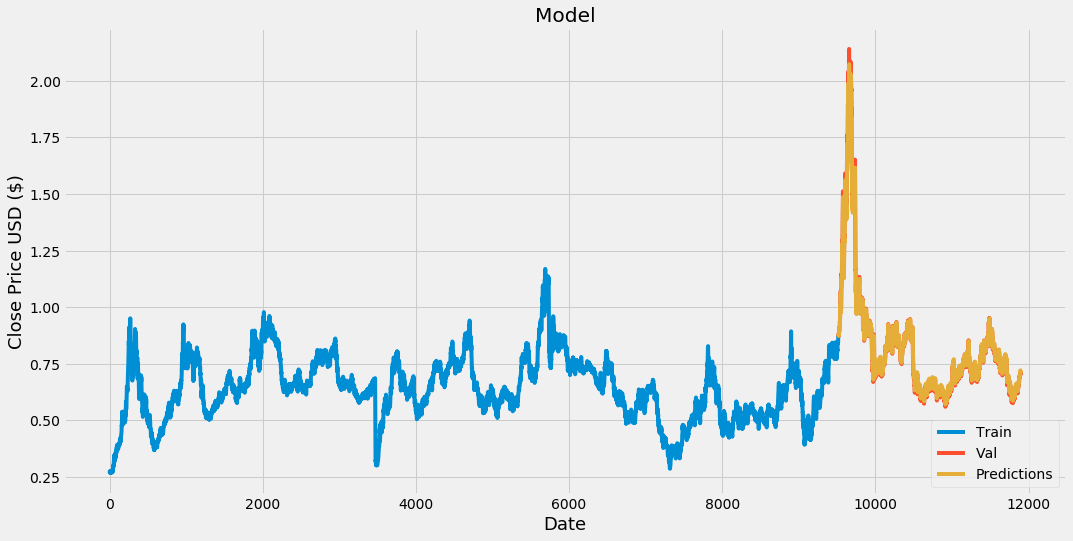

0.020308373554215327
Epoch 1/10
9489/9489 [==============================] - 13s 1ms/step - loss: 9.7866e-04
Epoch 2/10
9489/9489 [==============================] - 11s 1ms/step - loss: 2.6604e-04
Epoch 3/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.8917e-04
Epoch 4/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.6100e-04
Epoch 5/10
9489/9489 [==============================] - 10s 1ms/step - loss: 1.4102e-04
Epoch 6/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.4308e-04
Epoch 7/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.2454e-04
Epoch 8/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.1390e-04
Epoch 9/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.1030e-04
Epoch 10/10
9489/9489 [==============================] - 10s 1ms/step - loss: 1.0843e-04


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


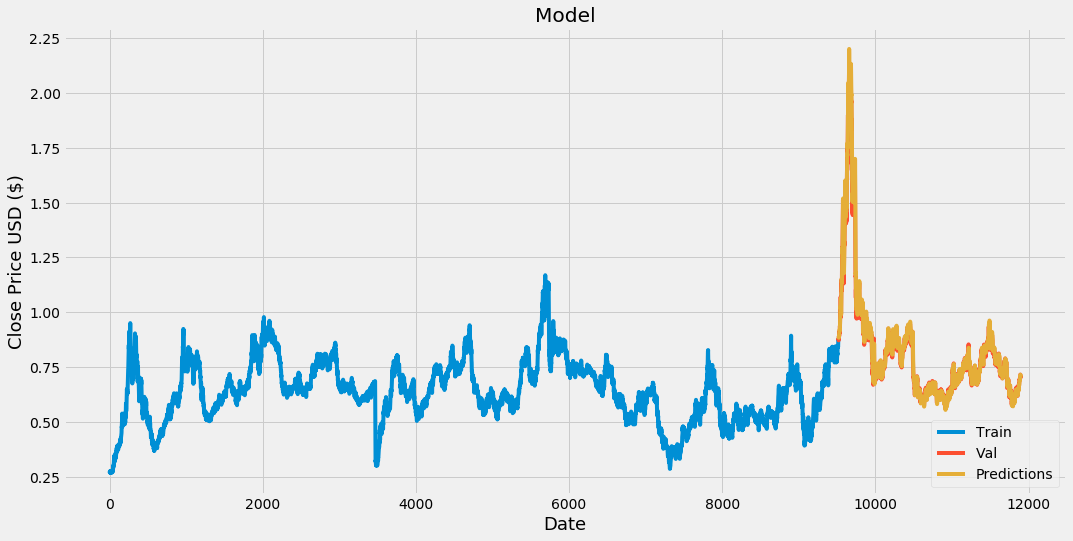

0.02671009478078761
Epoch 1/15
9489/9489 [==============================] - 12s 1ms/step - loss: 7.5335e-04
Epoch 2/15
9489/9489 [==============================] - 11s 1ms/step - loss: 2.4550e-04
Epoch 3/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.7429e-04
Epoch 4/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.4547e-04
Epoch 5/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.3737e-04
Epoch 6/15
9489/9489 [==============================] - 12s 1ms/step - loss: 1.2835e-04
Epoch 7/15
9489/9489 [==============================] - 14s 1ms/step - loss: 1.1803e-04
Epoch 8/15
9489/9489 [==============================] - 12s 1ms/step - loss: 1.1458e-04
Epoch 9/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.0684e-04
Epoch 10/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.0185e-04
Epoch 11/15
9489/9489 [==============================] - 11s 1ms/step - loss: 9.9602e-05
Epoch 12/1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


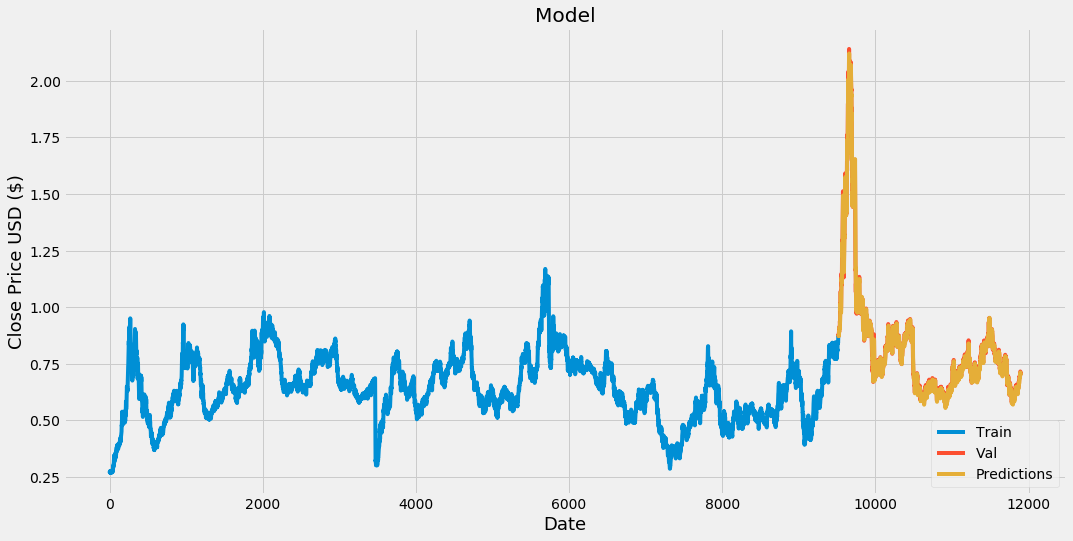

0.019911314507815924
Epoch 1/10
9489/9489 [==============================] - 67s 7ms/step - loss: 4.5049e-04
Epoch 2/10
9489/9489 [==============================] - 65s 7ms/step - loss: 2.1459e-04
Epoch 3/10
9489/9489 [==============================] - 71s 8ms/step - loss: 1.8419e-04
Epoch 4/10
9489/9489 [==============================] - 66s 7ms/step - loss: 1.6352e-04
Epoch 5/10
9489/9489 [==============================] - 65s 7ms/step - loss: 1.4213e-04
Epoch 6/10
9489/9489 [==============================] - 66s 7ms/step - loss: 1.3490e-04
Epoch 7/10
9489/9489 [==============================] - 64s 7ms/step - loss: 1.2374e-04
Epoch 8/10
9489/9489 [==============================] - 65s 7ms/step - loss: 1.1788e-04
Epoch 9/10
9489/9489 [==============================] - 66s 7ms/step - loss: 1.1270e-04
Epoch 10/10
9489/9489 [==============================] - 66s 7ms/step - loss: 1.0990e-04


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


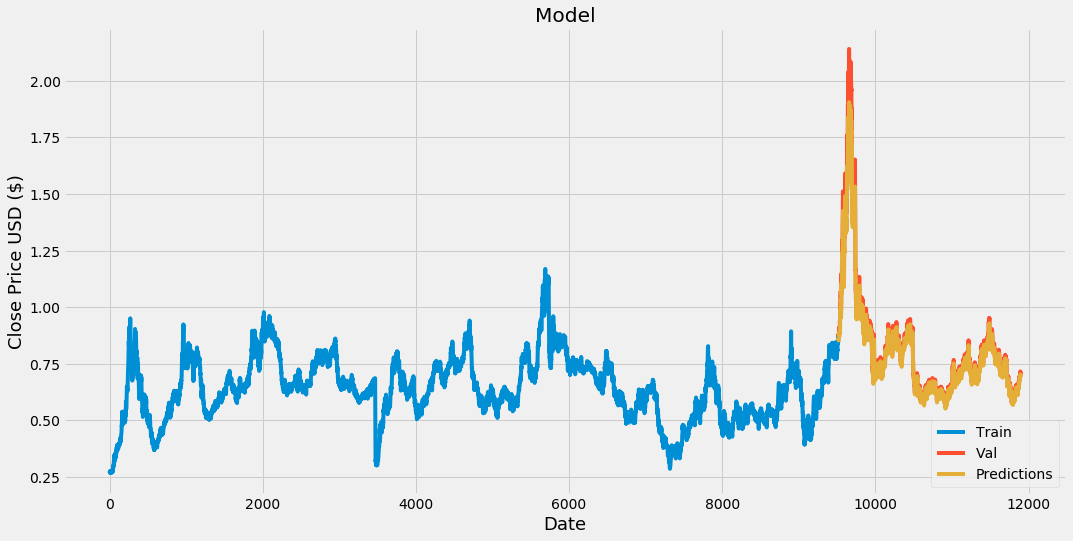

0.04147764247005351
Epoch 1/15
9489/9489 [==============================] - 67s 7ms/step - loss: 4.2309e-04
Epoch 2/15
9489/9489 [==============================] - 66s 7ms/step - loss: 2.1786e-04
Epoch 3/15
9489/9489 [==============================] - 70s 7ms/step - loss: 1.8049e-04
Epoch 4/15
9489/9489 [==============================] - 67s 7ms/step - loss: 1.5681e-04
Epoch 5/15
9489/9489 [==============================] - 65s 7ms/step - loss: 1.4408e-04
Epoch 6/15
9489/9489 [==============================] - 65s 7ms/step - loss: 1.3245e-04
Epoch 7/15
9489/9489 [==============================] - 65s 7ms/step - loss: 1.2539e-04
Epoch 8/15
9489/9489 [==============================] - 67s 7ms/step - loss: 1.2145e-04
Epoch 9/15
9489/9489 [==============================] - 66s 7ms/step - loss: 1.1386e-04
Epoch 10/15
9489/9489 [==============================] - 66s 7ms/step - loss: 1.0879e-04
Epoch 11/15
9489/9489 [==============================] - 67s 7ms/step - loss: 1.0888e-04
Epoch 12/1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


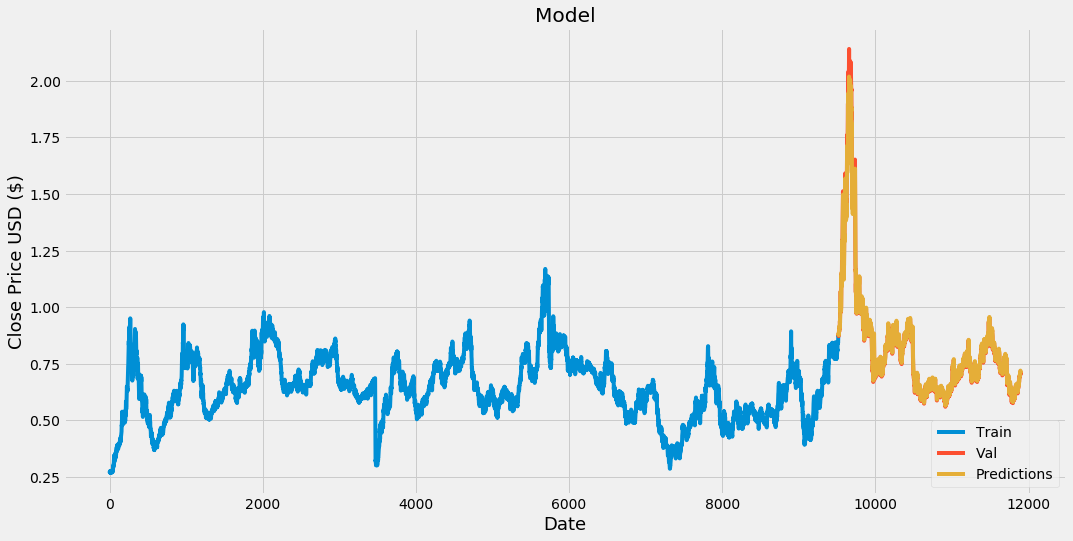

0.022543470647462326
Epoch 1/10
9489/9489 [==============================] - 20s 2ms/step - loss: 7.6922e-04
Epoch 2/10
9489/9489 [==============================] - 20s 2ms/step - loss: 2.5664e-04
Epoch 3/10
9489/9489 [==============================] - 19s 2ms/step - loss: 2.1722e-04
Epoch 4/10
9489/9489 [==============================] - 19s 2ms/step - loss: 2.0041e-04
Epoch 5/10
9489/9489 [==============================] - 20s 2ms/step - loss: 1.7839e-04
Epoch 6/10
9489/9489 [==============================] - 20s 2ms/step - loss: 1.6484e-04
Epoch 7/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.6130e-04
Epoch 8/10
9489/9489 [==============================] - 20s 2ms/step - loss: 1.4731e-04
Epoch 9/10
9489/9489 [==============================] - 20s 2ms/step - loss: 1.4264e-04
Epoch 10/10
9489/9489 [==============================] - 19s 2ms/step - loss: 1.4078e-04


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


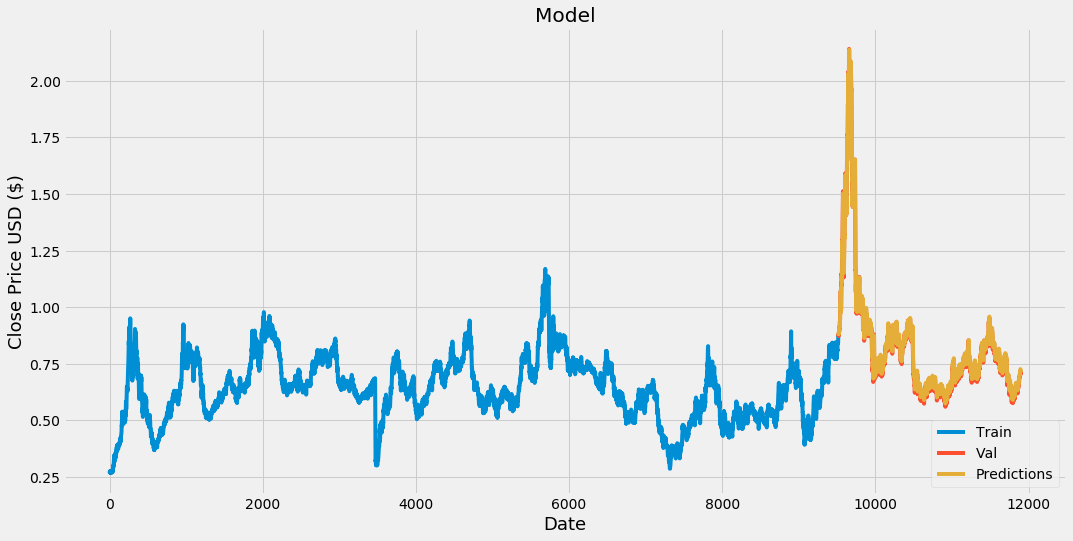

0.020810764990730667
Epoch 1/15
9489/9489 [==============================] - 20s 2ms/step - loss: 7.6207e-04
Epoch 2/15
9489/9489 [==============================] - 20s 2ms/step - loss: 2.6504e-04
Epoch 3/15
9489/9489 [==============================] - 19s 2ms/step - loss: 2.2184e-04
Epoch 4/15
9489/9489 [==============================] - 19s 2ms/step - loss: 1.9895e-04
Epoch 5/15
9489/9489 [==============================] - 19s 2ms/step - loss: 1.8204e-04
Epoch 6/15
9489/9489 [==============================] - 18s 2ms/step - loss: 1.7355e-04
Epoch 7/15
9489/9489 [==============================] - 19s 2ms/step - loss: 1.6193e-04
Epoch 8/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.4883e-04
Epoch 9/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.5015e-04
Epoch 10/15
9489/9489 [==============================] - 20s 2ms/step - loss: 1.3904e-04
Epoch 11/15
9489/9489 [==============================] - 21s 2ms/step - loss: 1.3349e-04
Epoch 12/

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


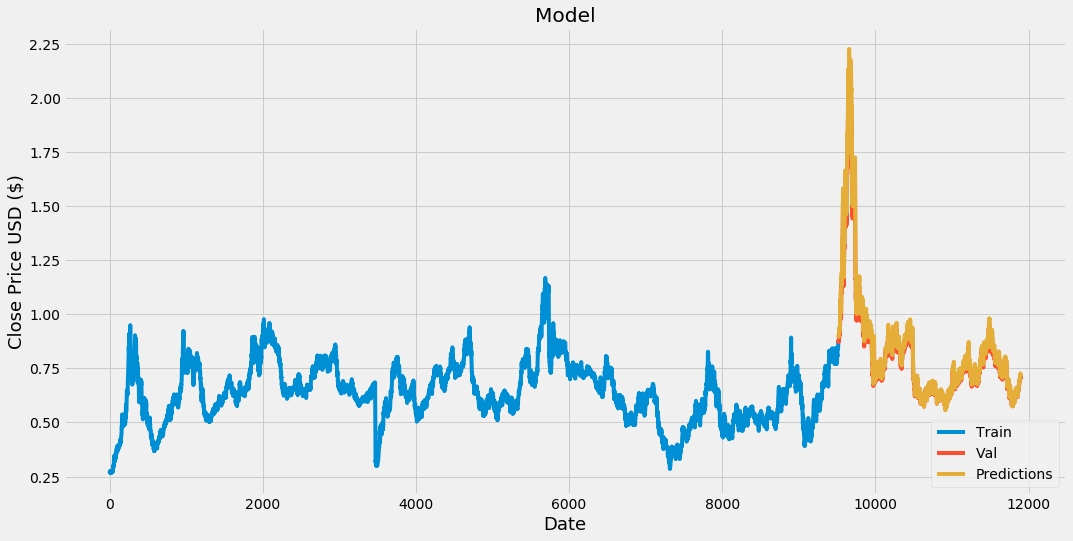

0.030588930572226638
Epoch 1/10
9489/9489 [==============================] - 12s 1ms/step - loss: 0.0011
Epoch 2/10
9489/9489 [==============================] - 11s 1ms/step - loss: 3.3400e-04
Epoch 3/10
9489/9489 [==============================] - 11s 1ms/step - loss: 2.4517e-04
Epoch 4/10
9489/9489 [==============================] - 11s 1ms/step - loss: 2.1505e-04
Epoch 5/10
9489/9489 [==============================] - 11s 1ms/step - loss: 2.0179e-04
Epoch 6/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.8774e-04
Epoch 7/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.7905e-04
Epoch 8/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.7412e-04
Epoch 9/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.6326e-04
Epoch 10/10
9489/9489 [==============================] - 11s 1ms/step - loss: 1.5532e-04


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


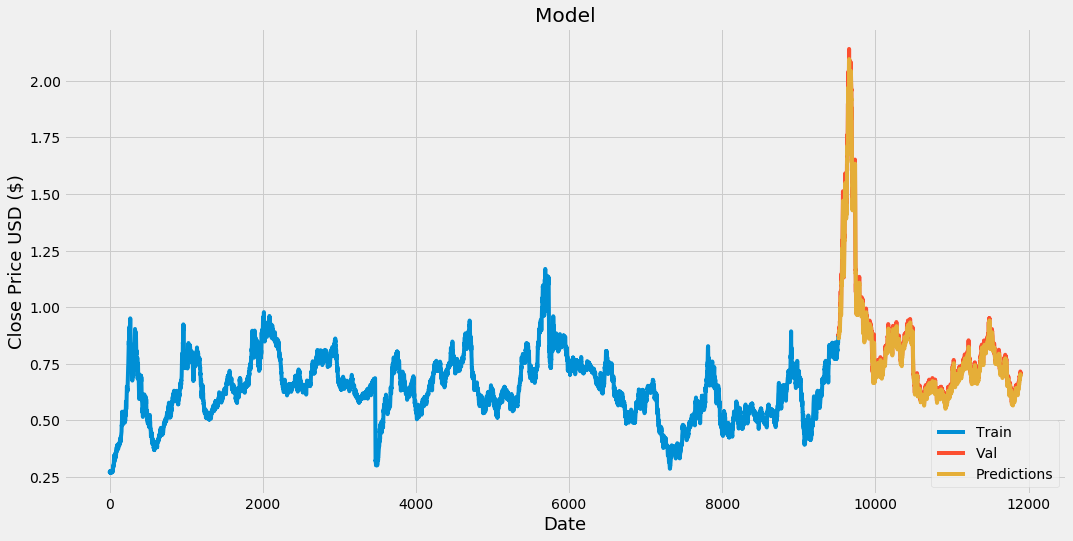

0.02436223186217128
Epoch 1/15
9489/9489 [==============================] - 12s 1ms/step - loss: 9.7783e-04
Epoch 2/15
9489/9489 [==============================] - 11s 1ms/step - loss: 3.2921e-04
Epoch 3/15
9489/9489 [==============================] - 12s 1ms/step - loss: 2.4855e-04
Epoch 4/15
9489/9489 [==============================] - 11s 1ms/step - loss: 2.1761e-04
Epoch 5/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.9772e-04
Epoch 6/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.8643e-04
Epoch 7/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.8090e-04
Epoch 8/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.7354e-04
Epoch 9/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.6650e-04
Epoch 10/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.6206e-04
Epoch 11/15
9489/9489 [==============================] - 11s 1ms/step - loss: 1.5752e-04
Epoch 12/1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


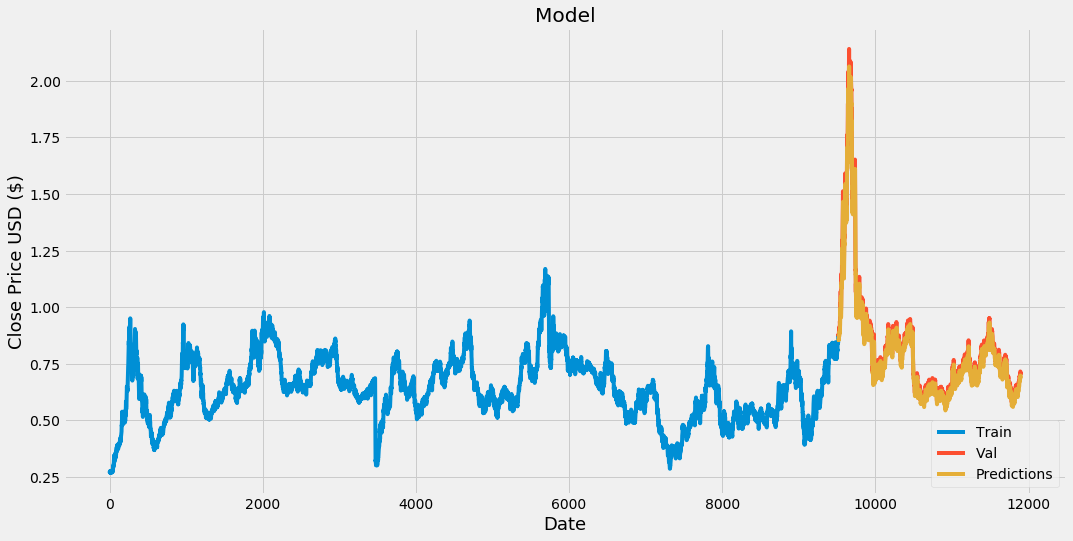

0.028362597417089713
Epoch 1/10
9474/9474 [==============================] - 103s 11ms/step - loss: 4.2494e-04
Epoch 2/10
8296/9474 [=========================>....] - ETA: 12s - loss: 1.8333e-04

KeyboardInterrupt: 

In [5]:
result_error = [0.027124001463149368, 0.024164056429890814, 0.021911798834714263, 0.029715465760467945, 0.02682591621618717, 0.026021242447505782, 0.017960435275332212, 0.029981253151595964, 0.05310163232400653, 0.02264978753070666, 0.03738813799228153, 0.02808732017245239, 0.02666602749346958, 0.02031197400482758]
result_parameters = [[30, 40, 'adam', 4, 10], [30, 40, 'adam', 4, 15], [30, 40, 'adam', 16, 10], [30, 40, 'adam', 16, 15], [30, 40, 'adam', 32, 10], [30, 40, 'adam', 32, 15], [30, 40, 'rmsprop', 4, 10], [30, 40, 'rmsprop', 4, 15], [30, 40, 'rmsprop', 16, 10], [30, 40, 'rmsprop', 16, 15], [30, 40, 'rmsprop', 32, 10], [30, 40, 'rmsprop', 32, 15], [30, 50, 'adam', 4, 10], [30, 50, 'adam', 4, 15]]

time_values = [30,45,60]
neurons_values = [40,50]
optimizer_values = ['adam','rmsprop']
batch_values = [4,16,32]
epochs_values = [10,15]

dataset = df.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets


for t in time_values:
    for n in neurons_values:
        for o in optimizer_values:
            for b in batch_values:
                for e in epochs_values:
                    result_parameters.append([t,n,o,b,e])
                    result_error.append(modelTraining(t,n,o,b,e,train_data))


In [6]:
print(result_parameters)
print(result_error)

[[30, 40, 'adam', 4, 10], [30, 40, 'adam', 4, 15], [30, 40, 'adam', 16, 10], [30, 40, 'adam', 16, 15], [30, 40, 'adam', 32, 10], [30, 40, 'adam', 32, 15], [30, 40, 'rmsprop', 4, 10], [30, 40, 'rmsprop', 4, 15], [30, 40, 'rmsprop', 16, 10], [30, 40, 'rmsprop', 16, 15], [30, 40, 'rmsprop', 32, 10], [30, 40, 'rmsprop', 32, 15], [30, 50, 'adam', 4, 10], [30, 50, 'adam', 4, 15], [30, 50, 'adam', 16, 10], [30, 50, 'adam', 16, 15], [30, 50, 'adam', 32, 10], [30, 50, 'adam', 32, 15], [30, 50, 'rmsprop', 4, 10], [30, 50, 'rmsprop', 4, 15], [30, 50, 'rmsprop', 16, 10], [30, 50, 'rmsprop', 16, 15], [30, 50, 'rmsprop', 32, 10], [30, 50, 'rmsprop', 32, 15], [45, 40, 'adam', 4, 10]]
[0.027124001463149368, 0.024164056429890814, 0.021911798834714263, 0.029715465760467945, 0.02682591621618717, 0.026021242447505782, 0.017960435275332212, 0.029981253151595964, 0.05310163232400653, 0.02264978753070666, 0.03738813799228153, 0.02808732017245239, 0.02666602749346958, 0.02031197400482758, 0.024887883639910825

In [7]:
min_index = result_error.index(min(result_error))

In [8]:
result_parameters[min_index]

[30, 40, 'rmsprop', 4, 10]

**Parameter Tuning Results for 30 days of time set in LSTM**

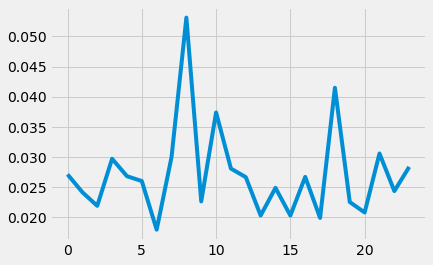

In [9]:
plt.plot(result_error)

In [15]:
for i in range(len(result_error)):
    result_parameters[i].append(result_error[i])

In [16]:
conclusion = pd.DataFrame(result_parameters,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

**Results in Tabular form**

In [17]:
conclusion

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,30,40,adam,4,10,0.027124
1,30,40,adam,4,15,0.024164
2,30,40,adam,16,10,0.021912
3,30,40,adam,16,15,0.029715
4,30,40,adam,32,10,0.026826
5,30,40,adam,32,15,0.026021
6,30,40,rmsprop,4,10,0.017960
7,30,40,rmsprop,4,15,0.029981
8,30,40,rmsprop,16,10,0.053102
9,30,40,rmsprop,16,15,0.022650


In [18]:
conclusion.sort_values('RMS')

,learning_time,neurons,optimizer,batch_size,epochs,RMS
6,30,40,rmsprop,4,10,0.017960
17,30,50,adam,32,15,0.019911
15,30,50,adam,16,15,0.020308
13,30,50,adam,4,15,0.020312
20,30,50,rmsprop,16,10,0.020811
2,30,40,adam,16,10,0.021912
19,30,50,rmsprop,4,15,0.022543
9,30,40,rmsprop,16,15,0.022650
1,30,40,adam,4,15,0.024164
22,30,50,rmsprop,32,10,0.024362


# Observations

* The Best Result comes with parameters: **Neurons = 40**, **Optimizer = RMSPROP**, **Batch_size = 4**, **Epochs = 10**
* Overall Results show that using **Neurons = 50**, **Optimizer = Adam**, **Epochs = 15** gives optimal results with all batch size
* So we will consider above 2 parametrs (In second case the batch size 16 will be used) and test for time parameters: 45 and 60 to see if we can increse the accuracy
* We could have added the Time parameter in parameter tuning but it then require 72 combinations. Our current hardware and kaggle use limit does not permit this

# Training above 2 choosen parameters sets on Time = 45days 

Epoch 1/10
9474/9474 [==============================] - 108s 11ms/step - loss: 4.4318e-04
Epoch 2/10
9474/9474 [==============================] - 109s 11ms/step - loss: 2.1327e-04
Epoch 3/10
9474/9474 [==============================] - 107s 11ms/step - loss: 1.8406e-04
Epoch 4/10
9474/9474 [==============================] - 103s 11ms/step - loss: 1.6553e-04
Epoch 5/10
9474/9474 [==============================] - 103s 11ms/step - loss: 1.4622e-04
Epoch 6/10
9474/9474 [==============================] - 106s 11ms/step - loss: 1.3690e-04
Epoch 7/10
9474/9474 [==============================] - 102s 11ms/step - loss: 1.2708e-04
Epoch 8/10
9474/9474 [==============================] - 104s 11ms/step - loss: 1.2153e-04
Epoch 9/10
9474/9474 [==============================] - 105s 11ms/step - loss: 1.1150e-04
Epoch 10/10
9474/9474 [==============================] - 105s 11ms/step - loss: 1.0881e-04


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


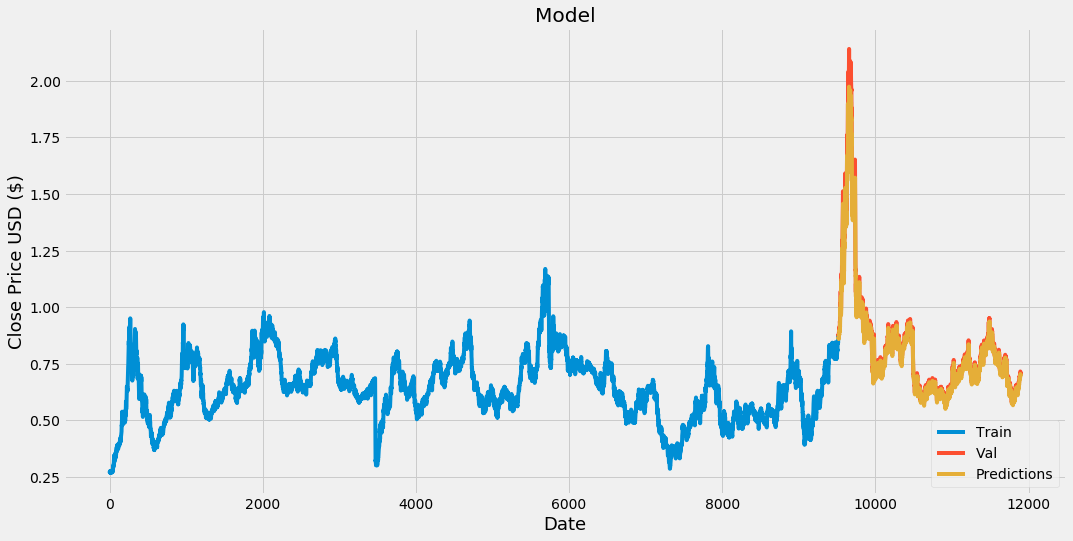

0.031227100553465007
Epoch 1/15
9474/9474 [==============================] - 29s 3ms/step - loss: 7.0358e-04
Epoch 2/15
9474/9474 [==============================] - 30s 3ms/step - loss: 1.9566e-04
Epoch 3/15
9474/9474 [==============================] - 29s 3ms/step - loss: 1.5435e-04
Epoch 4/15
9474/9474 [==============================] - 29s 3ms/step - loss: 1.3708e-04
Epoch 5/15
9474/9474 [==============================] - 31s 3ms/step - loss: 1.2285e-04
Epoch 6/15
9474/9474 [==============================] - 29s 3ms/step - loss: 1.1835e-04
Epoch 7/15
9474/9474 [==============================] - 28s 3ms/step - loss: 1.1062e-04
Epoch 8/15
9474/9474 [==============================] - 29s 3ms/step - loss: 1.0191e-04
Epoch 9/15
9474/9474 [==============================] - 28s 3ms/step - loss: 1.0435e-04
Epoch 10/15
9474/9474 [==============================] - 29s 3ms/step - loss: 1.0903e-04
Epoch 11/15
9474/9474 [==============================] - 29s 3ms/step - loss: 9.5629e-05
Epoch 12/

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


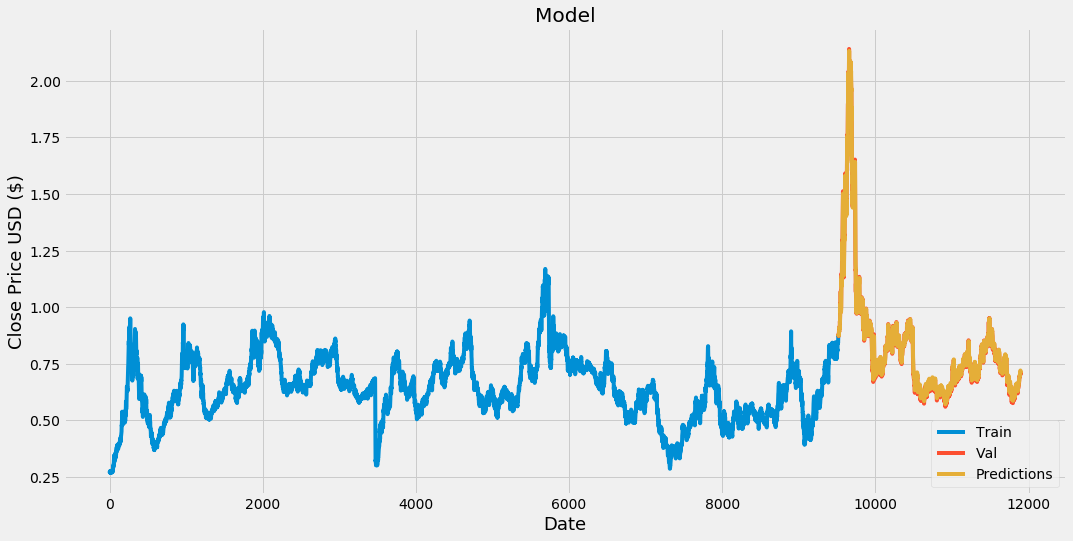

0.018285013590330745


In [19]:
# Training on 45 days
result_error_45 = []
result_parameter_45 = [[45,50,'rmsprop',4,10],[45,50,'adam',16,15]]

result_error_45.append(modelTraining(45,50,'rmsprop',4,10,train_data))
result_error_45.append(modelTraining(45,50,'adam',16,15,train_data))

In [22]:
print(result_parameter_45)
print(result_error_45)

[[45, 50, 'rmsprop', 4, 10], [45, 50, 'adam', 16, 15]]
[0.031227100553465007, 0.018285013590330745]


In [23]:
for i in range(len(result_error_45)):
    result_parameter_45[i].append(result_error_45[i])

In [24]:
conclusion_45 = pd.DataFrame(result_parameter_45,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

In [25]:
conclusion_45

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,45,50,rmsprop,4,10,0.031227
1,45,50,adam,16,15,0.018285


# Training above 2 choosen parameters sets on Time = 60 days 

Epoch 1/10
9459/9459 [==============================] - 145s 15ms/step - loss: 4.0157e-04
Epoch 2/10
9459/9459 [==============================] - 145s 15ms/step - loss: 2.0772e-04
Epoch 3/10
9459/9459 [==============================] - 142s 15ms/step - loss: 1.6949e-04
Epoch 4/10
9459/9459 [==============================] - 140s 15ms/step - loss: 1.5333e-04
Epoch 5/10
9459/9459 [==============================] - 137s 15ms/step - loss: 1.3557e-04
Epoch 6/10
9459/9459 [==============================] - 141s 15ms/step - loss: 1.3000e-04
Epoch 7/10
9459/9459 [==============================] - 139s 15ms/step - loss: 1.1937e-04
Epoch 8/10
9459/9459 [==============================] - 140s 15ms/step - loss: 1.1410e-04
Epoch 9/10
9459/9459 [==============================] - 138s 15ms/step - loss: 1.1076e-04
Epoch 10/10
9459/9459 [==============================] - 138s 15ms/step - loss: 1.0609e-04


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


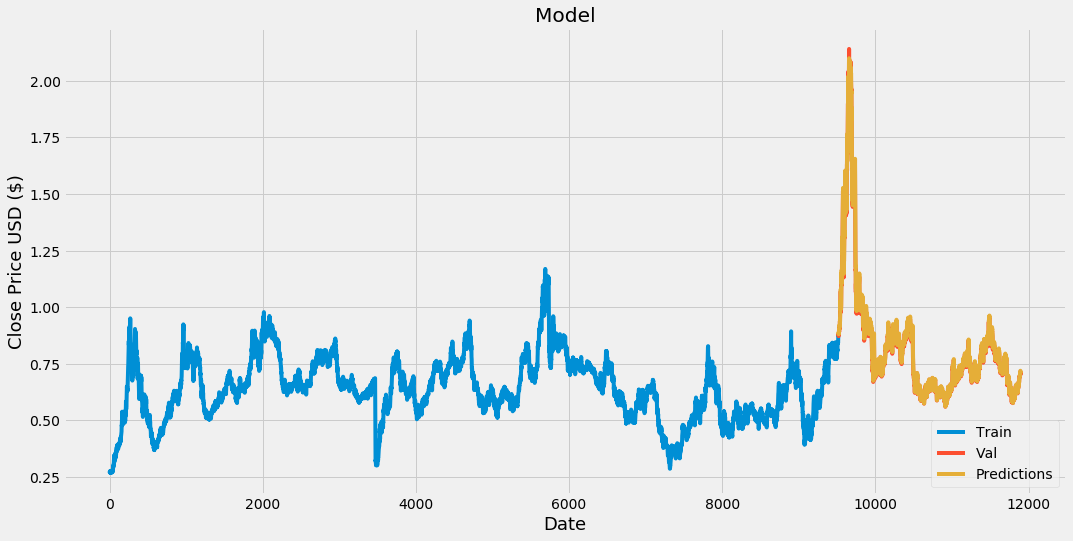

0.01858789369372681
Epoch 1/15
9459/9459 [==============================] - 40s 4ms/step - loss: 6.6664e-04
Epoch 2/15
9459/9459 [==============================] - 39s 4ms/step - loss: 1.9412e-04
Epoch 3/15
9459/9459 [==============================] - 39s 4ms/step - loss: 1.5902e-04
Epoch 4/15
9459/9459 [==============================] - 39s 4ms/step - loss: 1.3174e-04
Epoch 5/15
9459/9459 [==============================] - 42s 4ms/step - loss: 1.2452e-04
Epoch 6/15
9459/9459 [==============================] - 43s 5ms/step - loss: 1.1887e-04
Epoch 7/15
9459/9459 [==============================] - 42s 4ms/step - loss: 1.1621e-04
Epoch 8/15
9459/9459 [==============================] - 43s 5ms/step - loss: 1.1075e-04
Epoch 9/15
9459/9459 [==============================] - 42s 4ms/step - loss: 1.0419e-04
Epoch 10/15
9459/9459 [==============================] - 40s 4ms/step - loss: 1.0678e-04
Epoch 11/15
9459/9459 [==============================] - 39s 4ms/step - loss: 1.0180e-04
Epoch 12/1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


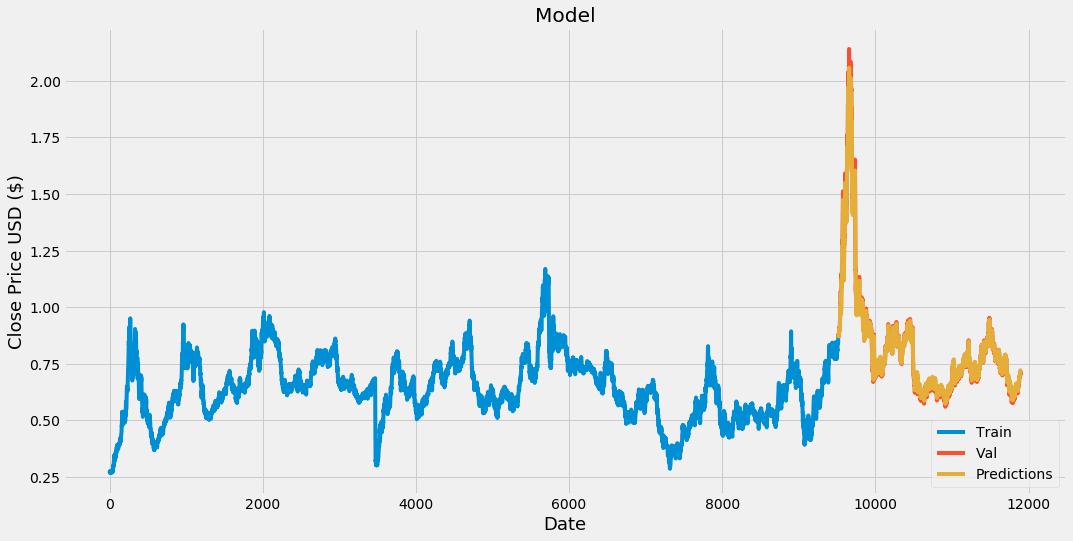

0.022446670889171603


In [26]:
# Training on 60 days
result_error_60 = []
result_parameter_60 = [[60,50,'rmsprop',4,10],[60,50,'adam',16,15]]

result_error_60.append(modelTraining(60,50,'rmsprop',4,10,train_data))
result_error_60.append(modelTraining(60,50,'adam',16,15,train_data))

In [27]:
print(result_parameter_60)
print(result_error_60)

[[60, 50, 'rmsprop', 4, 10], [60, 50, 'adam', 16, 15]]
[0.01858789369372681, 0.022446670889171603]


In [28]:
for i in range(len(result_error_60)):
    result_parameter_60[i].append(result_error_60[i])

In [30]:
conclusion_60 = pd.DataFrame(result_parameter_60,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

In [31]:
conclusion_60

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,60,50,rmsprop,4,10,0.018588
1,60,50,adam,16,15,0.022447


In [35]:
results = pd.concat([conclusion,conclusion_45,conclusion_60], axis=0)
results

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,30,40,adam,4,10,0.027124
1,30,40,adam,4,15,0.024164
2,30,40,adam,16,10,0.021912
3,30,40,adam,16,15,0.029715
4,30,40,adam,32,10,0.026826
5,30,40,adam,32,15,0.026021
6,30,40,rmsprop,4,10,0.017960
7,30,40,rmsprop,4,15,0.029981
8,30,40,rmsprop,16,10,0.053102
9,30,40,rmsprop,16,15,0.022650


In [36]:
results.sort_values('RMS')

,learning_time,neurons,optimizer,batch_size,epochs,RMS
6,30,40,rmsprop,4,10,0.017960
1,45,50,adam,16,15,0.018285
0,60,50,rmsprop,4,10,0.018588
17,30,50,adam,32,15,0.019911
15,30,50,adam,16,15,0.020308
13,30,50,adam,4,15,0.020312
20,30,50,rmsprop,16,10,0.020811
2,30,40,adam,16,10,0.021912
1,60,50,adam,16,15,0.022447
19,30,50,rmsprop,4,15,0.022543


# Top 3 model parameters with least error

# 1. RMS = 0.017960


## Parameters
### Time = 30, Neurons = 40, Optimizer = RMSPROP, Batch_size = 4, Epochs = 10

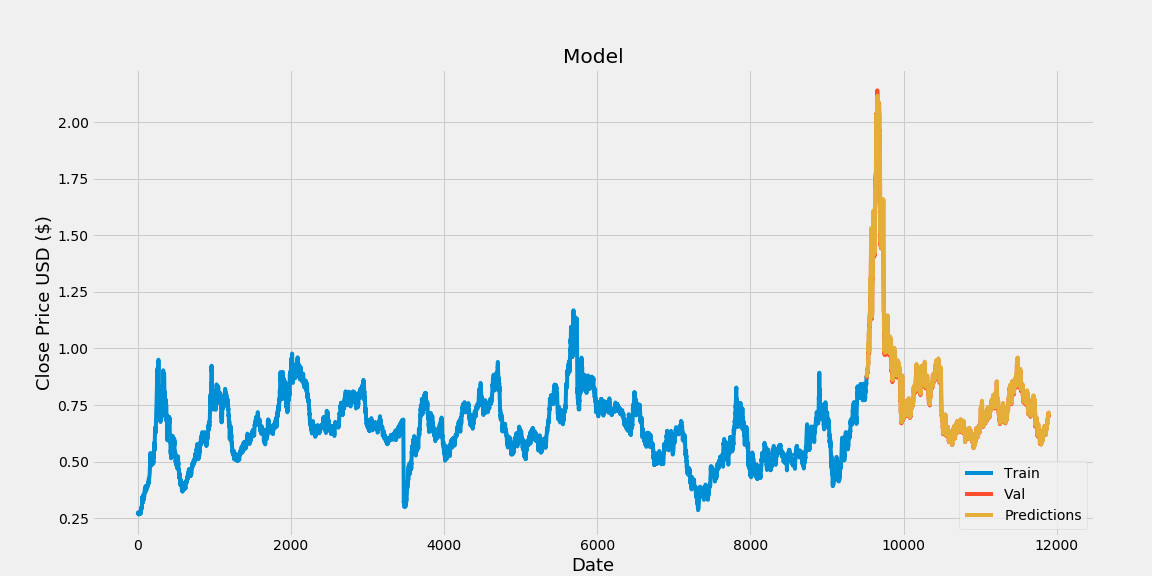


# 2. RMS = 0.018285

## Parameters
### Time = 45, Neurons = 15, Optimizer = Adam, Batch_size = 16, Epochs = 15

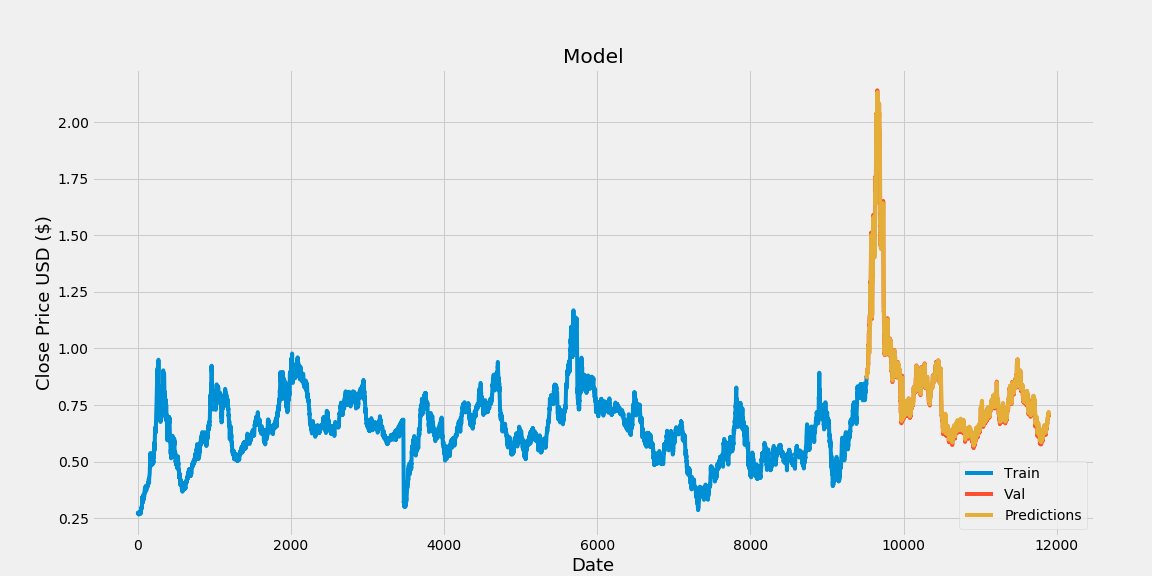


# 3. RMS = 0.018588

## Parameters
### Time = 60, Neurons = 50, Optimizer = RMSPROP, Batch_size = 4, Epochs = 10
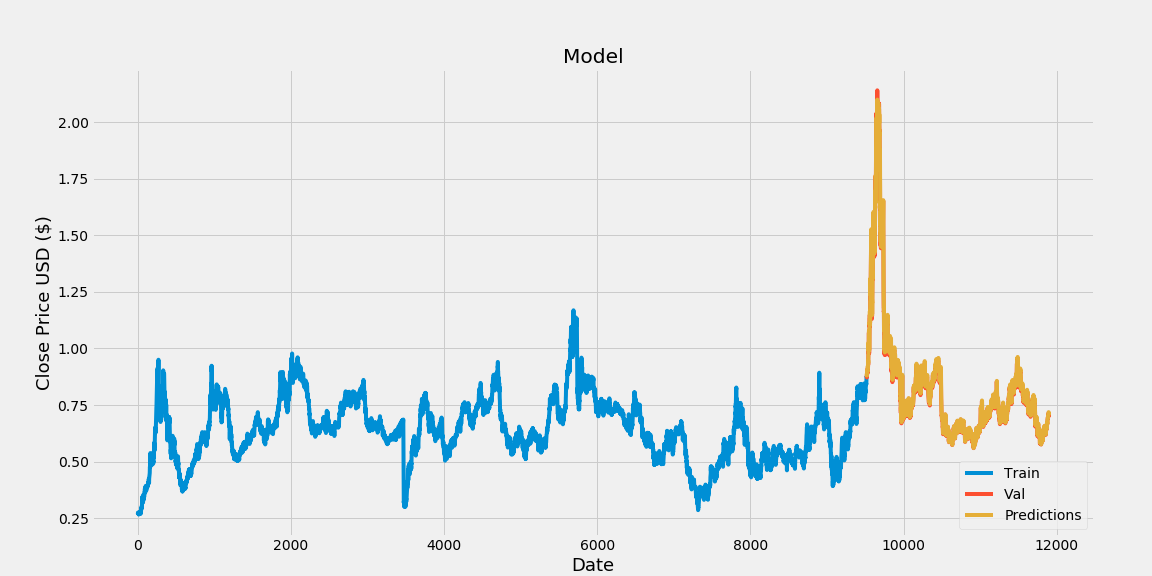

# Loading any above trained model

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('json_file_name_for_the_model', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor2 = model_from_json(loaded_model_json)
# load weights into new model
regressor2.load_weights("file_name_of_weights_of_selected_model")
print("Loaded model from disk")